In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("train_cab_data.csv")

In [3]:
data

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [4]:
data.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [5]:
data["Customer_Since_Months"]=data["Customer_Since_Months"].fillna(data["Customer_Since_Months"].mean())
data["Life_Style_Index"]=data["Life_Style_Index"].fillna(data["Life_Style_Index"].mean())
data["Var1"]=data["Var1"].fillna(data["Var1"].mean())
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

<AxesSubplot:>

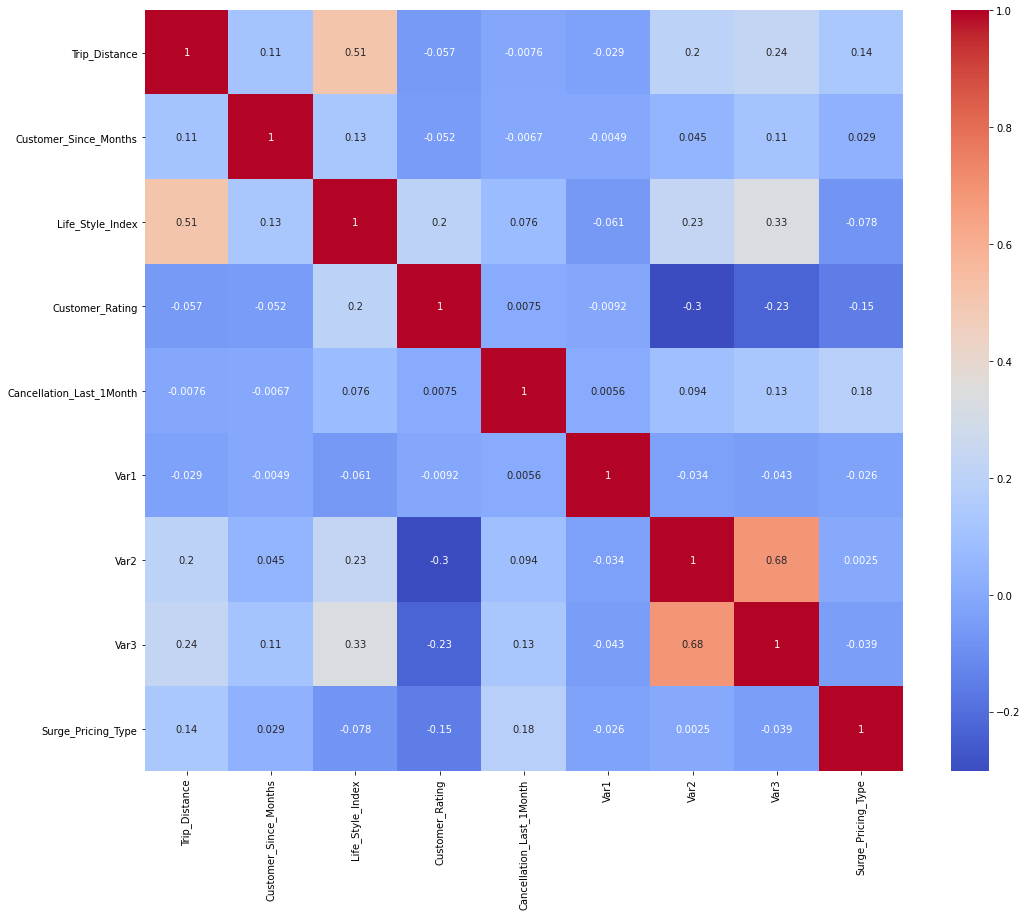

In [7]:
plt.figure(figsize=(17,14))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### Feature engineering

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[[i]]=le.fit_transform(data[[i]])

In [9]:
data.drop('Trip_ID',axis=1,inplace=True)

In [10]:
data['Trip_Distance_Customer_Rating'] = round(data['Trip_Distance'] * data['Customer_Rating'],2)

In [11]:
data['Trip_Distance_to_Rating_Ratio'] = round(data['Trip_Distance'] / data['Customer_Rating'],2)

In [12]:
data

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Trip_Distance_Customer_Rating,Trip_Distance_to_Rating_Ratio
0,6.77,1,1.0,2.42769,0,0,3.90500,0,40.000000,46,60,0,2,26.44,1.73
1,29.47,1,10.0,2.78245,1,0,3.45000,0,38.000000,56,78,1,2,101.67,8.54
4,54.95,2,10.0,3.03453,1,0,3.40250,4,51.000000,49,102,1,2,186.97,16.15
6,29.72,4,10.0,2.83958,2,1,2.97500,1,83.000000,50,75,1,2,88.42,9.99
7,18.44,1,2.0,2.81871,1,0,3.58250,0,103.000000,46,63,1,2,66.06,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,3,1.0,2.74229,0,0,3.28500,0,61.000000,47,76,1,3,38.50,3.57
131658,74.81,2,7.0,2.81059,2,0,0.44500,0,64.202698,63,88,1,2,33.29,168.11
131659,40.17,2,10.0,2.99565,1,0,3.33625,0,64.202698,48,75,0,2,134.02,12.04
131660,46.88,1,4.0,3.04744,0,1,4.15750,1,47.000000,54,79,1,2,194.90,11.28


In [13]:
count = np.isinf(data).values.sum()
print(count)

0


### Hypothesis testing 

In [14]:
def chi_square_test(x,y):
    import scipy
    from scipy.stats import chi2
    
    
    alpha=0.05    #value of alpha with 95% confidence interval                                                 
    new=pd.crosstab(x,y) #checking frequency
    df=(new.shape[0]-1)*(new.shape[1]-1) #calculating degrees of freedom
    observed_values=new.values #Observed values
    val=scipy.stats.chi2_contingency(observed_values) #calculating expected values
    expected_values=val[-1] #choosing only the expected values
    new_value=(observed_values-expected_values)**2/expected_values #caluculating chi squared values
    k=new_value.reshape(1,-1)
    chi_square_value=0 #Final or total chi squared value
    for i in k:
        for j in i:
            chi_square_value+=j
    critical_value=chi2.ppf(q=1-alpha,df=df) #Finding critical value
    p_value=1-chi2.cdf(x=chi_square_value,df=df) #Finding p value
    
    #if the p value is lesser than 0.05 we accept the null hypothesis or else we will reject
    if p_value<=alpha:
        print("Relationship exits")
    else:
        print("No relationship")
        
        
    #if the chi square value is lesser than the critical value,we will accept the null hypothesis or reject
    #if chi_square_value<=critical_value:
        #print("Accept the null hypothesis")
    #else:
        #print("Reject the null hypothesis")

In [15]:
def anova_test(x,y):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    formula='{0} ~ {1}'.format(x,y)
    model=ols(formula,data=data).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    anova_result.dropna(inplace=True,axis=0)
    for i in anova_result["PR(>F)"]:
        if i<0.05:
            print("Relationship exits")
        else:
            print("No relationship")

In [16]:
for i in ["Type_of_Cab","Confidence_Life_Style_Index","Destination_Type","Gender"]:
    print(i,",","Surge_Pricing_Type")
    chi_square_test(data[i],data["Surge_Pricing_Type"])
    print(" ")
    print("----------------------------")

Type_of_Cab , Surge_Pricing_Type
Relationship exits
 
----------------------------
Confidence_Life_Style_Index , Surge_Pricing_Type
Relationship exits
 
----------------------------
Destination_Type , Surge_Pricing_Type
Relationship exits
 
----------------------------
Gender , Surge_Pricing_Type
No relationship
 
----------------------------


In [17]:
for i in data.drop(["Type_of_Cab","Confidence_Life_Style_Index","Destination_Type","Gender"],axis=1).columns[:-3]:
    print(i,",","Surge_Pricing_Type")
    x='data["{0}"]'.format(i)
    y='data["Surge_Pricing_Type"]'
    anova_test(x,y)
    print(" ")
    print("--------------------")

Trip_Distance , Surge_Pricing_Type
Relationship exits
 
--------------------
Customer_Since_Months , Surge_Pricing_Type
Relationship exits
 
--------------------
Life_Style_Index , Surge_Pricing_Type
Relationship exits
 
--------------------
Customer_Rating , Surge_Pricing_Type
Relationship exits
 
--------------------
Cancellation_Last_1Month , Surge_Pricing_Type
Relationship exits
 
--------------------
Var1 , Surge_Pricing_Type
Relationship exits
 
--------------------
Var2 , Surge_Pricing_Type
No relationship
 
--------------------
Var3 , Surge_Pricing_Type
Relationship exits
 
--------------------


In [18]:
anova_test('data["Type_of_Cab"]','data["Surge_Pricing_Type"]')

Relationship exits


In [19]:
data.drop(["Gender","Var2"],axis=1,inplace=True)

### Model building

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [21]:
x=data.drop("Surge_Pricing_Type",axis=1)
y=data["Surge_Pricing_Type"]

from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=data["Surge_Pricing_Type"])

In [23]:
from xgboost import XGBClassifier

In [24]:
def best_model(x):
    model=x
    model.fit(x_train,y_train)
    y_p=model.predict(x_train)
    print("Training accuracy :",accuracy_score(y_train,y_p))
    y_pred=model.predict(x_test)
    print("Testing accuracy :",accuracy_score(y_test,y_pred))
    print("precision score :",precision_score(y_test,y_pred,average="weighted"))
    print("Recall score :",recall_score(y_test,y_pred,average="weighted"))

In [25]:
best_model(XGBClassifier())

[19:11:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy : 0.7761002120890774
Testing accuracy : 0.7357370095440084
precision score : 0.7394478186810748
Recall score : 0.7357370095440084


In [26]:
best_model(DecisionTreeClassifier())

Training accuracy : 1.0
Testing accuracy : 0.6052492046659597
precision score : 0.6055634468376219
Recall score : 0.6052492046659597


In [27]:
best_model(RandomForestClassifier())

Training accuracy : 1.0
Testing accuracy : 0.7293743372216331
precision score : 0.7329461768161393
Recall score : 0.7293743372216331


In [28]:
best_model(CatBoostClassifier())

Learning rate set to 0.098646
0:	learn: 1.0268349	total: 169ms	remaining: 2m 49s
1:	learn: 0.9704965	total: 191ms	remaining: 1m 35s
2:	learn: 0.9254418	total: 216ms	remaining: 1m 11s
3:	learn: 0.8896599	total: 237ms	remaining: 59s
4:	learn: 0.8596255	total: 281ms	remaining: 55.9s
5:	learn: 0.8348916	total: 303ms	remaining: 50.1s
6:	learn: 0.8137460	total: 325ms	remaining: 46.1s
7:	learn: 0.7959797	total: 351ms	remaining: 43.5s
8:	learn: 0.7813205	total: 385ms	remaining: 42.3s
9:	learn: 0.7686072	total: 415ms	remaining: 41.1s
10:	learn: 0.7580384	total: 448ms	remaining: 40.3s
11:	learn: 0.7485297	total: 480ms	remaining: 39.5s
12:	learn: 0.7412518	total: 509ms	remaining: 38.7s
13:	learn: 0.7345178	total: 536ms	remaining: 37.8s
14:	learn: 0.7287029	total: 566ms	remaining: 37.2s
15:	learn: 0.7233998	total: 600ms	remaining: 36.9s
16:	learn: 0.7190397	total: 661ms	remaining: 38.2s
17:	learn: 0.7147496	total: 711ms	remaining: 38.8s
18:	learn: 0.7105921	total: 742ms	remaining: 38.3s
19:	learn:

In [29]:
model=XGBClassifier()
model.fit(x_train,y_train)


[19:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [31]:
df=pd.read_csv("test_cab_data.csv")

In [32]:
df["Customer_Since_Months"]=df["Customer_Since_Months"].fillna(df["Customer_Since_Months"].mean())
df["Life_Style_Index"]=df["Life_Style_Index"].fillna(df["Life_Style_Index"].mean())
df["Var1"]=df["Var1"].fillna(df["Var1"].mean())
df.dropna(inplace=True)

In [35]:
df.drop(["Gender","Var2"],axis=1,inplace=True)

In [38]:
df['Trip_Distance_Customer_Rating'] = round(df['Trip_Distance'] * df['Customer_Rating'],2)

In [39]:
df['Trip_Distance_to_Rating_Ratio'] = round(df['Trip_Distance'] / df['Customer_Rating'],2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    if df[i].dtype=='object':
        df[[i]]=le.fit_transform(df[[i]])

In [44]:
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var3,Trip_Distance_Customer_Rating,Trip_Distance_to_Rating_Ratio
0,T0005689459,9.44,0,10.0,2.57438,0,1,3.68000,2,63.93661,63,34.74,2.57
1,T0005689462,32.15,1,10.0,2.85143,0,0,1.59375,0,65.00000,80,51.24,20.17
2,T0005689463,10.38,2,4.0,2.70530,0,3,4.50500,0,63.93661,74,46.76,2.30
4,T0005689468,32.03,1,7.0,2.81598,0,10,4.60125,3,96.00000,56,147.38,6.96
6,T0005689476,47.34,4,0.0,2.59558,2,1,0.84125,0,63.93661,73,39.82,56.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87389,T0005908502,24.32,1,10.0,2.77978,0,3,4.04625,1,63.93661,62,98.40,6.01
87390,T0005908503,29.43,2,3.0,2.40720,2,0,0.99750,0,74.00000,72,29.36,29.50
87391,T0005908504,14.83,2,10.0,2.57009,0,3,4.74375,0,109.00000,60,70.35,3.13
87392,T0005908505,37.86,0,6.0,3.08227,2,0,1.63500,0,63.93661,77,61.90,23.16


In [45]:
data=df.drop(["Trip_ID"],axis=1)

In [46]:
y_pred=model.predict(data)

In [47]:
df["Surge_Pricing_Type"]=y_pred

In [49]:
df[["Trip_ID","Surge_Pricing_Type"]].to_csv("Surge_pricing_submission.csv",index=False)